In [1]:
 """
    About as simple as it gets:
      - Use a circular Gaussian profile for the galaxy.
      - Convolve it by a circular Gaussian PSF.
      - Add Gaussian noise to the image.
"""

"""
New features introduced in this demo:

- obj = galsim.Gaussian(flux, sigma)
- obj = galsim.Convolve([list of objects])
- image = obj.drawImage(scale)
- image.added_flux  (Only present after a drawImage command.)
- noise = galsim.GaussianNoise(sigma)
- image.addNoise(noise)
- image.write(file_name)
- image.FindAdaptiveMom()
"""

import sys
import os
import math
import logging
import galsim

def main(argv):
   
    # In non-script code, use getLogger(__name__) at module scope instead.
    logging.basicConfig(format="%(message)s", level=logging.INFO, stream=sys.stdout)
    logger = logging.getLogger("demo1")

    gal_flux = 1.e5    # total counts on the image
    gal_sigma = 2.     # arcsec
    psf_sigma = 1.     # arcsec
    pixel_scale = 0.2  # arcsec / pixel
    noise = 30.        # standard deviation of the counts in each pixel

    logger.info('Starting demo script 1 using:')
    logger.info('    - circular Gaussian galaxy (flux = %.1e, sigma = %.1f),',gal_flux,gal_sigma)
    logger.info('    - circular Gaussian PSF (sigma = %.1f),',psf_sigma)
    logger.info('    - pixel scale = %.2f,',pixel_scale)
    logger.info('    - Gaussian noise (sigma = %.2f).',noise)

    # Define the galaxy profile
    gal = galsim.Gaussian(flux=gal_flux, sigma=gal_sigma)
    logger.debug('Made galaxy profile')

    # Define the PSF profile
    psf = galsim.Gaussian(flux=1., sigma=psf_sigma) # PSF flux should always = 1
    logger.debug('Made PSF profile')

    # Final profile is the convolution of these
    # Can include any number of things in the list, all of which are convolved
    # together to make the final flux profile.
    final = galsim.Convolve([gal, psf])
    logger.debug('Convolved components into final profile')

    # Draw the image with a particular pixel scale, given in arcsec/pixel.
    # The returned image has a member, added_flux, which is gives the total flux actually added to
    # the image.  One could use this value to check if the image is large enough for some desired
    # accuracy level.  Here, we just ignore it.
    image = final.drawImage(scale=pixel_scale)
    logger.debug('Made image of the profile: flux = %f, added_flux = %f',gal_flux,image.added_flux)

    # Add Gaussian noise to the image with specified sigma
    image.addNoise(galsim.GaussianNoise(sigma=noise))
    logger.debug('Added Gaussian noise')

    # Write the image to a file
    if not os.path.isdir('output'):
        os.mkdir('output')
    file_name = os.path.join('output','demo1.fits')
    # Note: if the file already exists, this will overwrite it.
    image.write(file_name)
    logger.info('Wrote image to %r' % file_name)  # using %r adds quotes around filename for us

    results = image.FindAdaptiveMom()

    logger.info('HSM reports that the image has observed shape and size:')
    logger.info('    e1 = %.3f, e2 = %.3f, sigma = %.3f (pixels)', results.observed_shape.e1,
                results.observed_shape.e2, results.moments_sigma)
    logger.info('Expected values in the limit that pixel response and noise are negligible:')
    logger.info('    e1 = %.3f, e2 = %.3f, sigma = %.3f', 0.0, 0.0,
                math.sqrt(gal_sigma**2 + psf_sigma**2)/pixel_scale)

if __name__ == "__main__":
    main(sys.argv)

Starting demo script 1 using:
    - circular Gaussian galaxy (flux = 1.0e+05, sigma = 2.0),
    - circular Gaussian PSF (sigma = 1.0),
    - pixel scale = 0.20,
    - Gaussian noise (sigma = 30.00).
Wrote image to 'output/demo1.fits'
HSM reports that the image has observed shape and size:
    e1 = 0.020, e2 = -0.007, sigma = 11.168 (pixels)
Expected values in the limit that pixel response and noise are negligible:
    e1 = 0.000, e2 = 0.000, sigma = 11.180


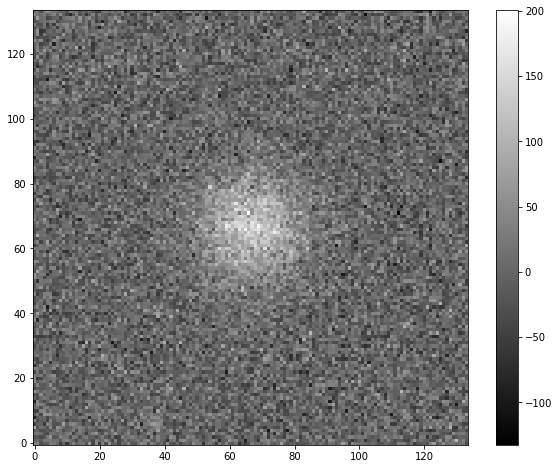

In [2]:
from astropy.utils.data import download_file
from astropy.io import fits
image_file = "output//demo1.fits"
import matplotlib.pyplot as plt
#get data quickly
image_data = fits.getdata(image_file)
#numpy swap rows and cols
plt.figure(figsize=(10,8))
plt.imshow(image_data.T, cmap='gray', origin='lower')
plt.colorbar();